In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
import xgboost as xgb
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class XGBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="XGBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = xgb.XGBRegressor
        if params is None:
            self.params = {
                'objective': 'reg:squarederror',
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 3,
                'subsample': 0.8,
                'colsample_bytree': 0.8
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(50, 5000),
                'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
                'max_depth': Integer(3, 10),
                'subsample': Real(0.6, 1.0),
                'colsample_bytree': Real(0.6, 1.0)
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

file_name = 'datos_preprocesados_Felipe_Agosto_2024.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
df_filtrado = df_filtrado.drop(columns=["ID","Sex","Educ","MMSE","Cat_MMSE","Cat_Educ","Site","Country","Eurolad_code","HDI","GINI","Group","Country_cat"])



In [5]:
df_filtrado

,Unnamed: 0,Slope,Knee,Offset,FD,PE,WMEAN,SSV,Delta_canon_RPD,Delta_canon_EPP,...,Low_subj_spec_EPP,High_subj_spec_RPD,High_subj_spec_EPP,Beta_subj_spec_RPD,Beta_subj_spec_EPP,Gamma_subj_spec_RPD,Gamma_subj_spec_EPP,IAF,TF,Age
0,1,3.004270,1474.776562,-8.502407,0.925981,1.133955,-0.677133,0.001070,0.001250,0.023754,...,0.026165,0.002972,0.026744,0.000296,0.021611,0.000017,0.001415,11.00,7.0,23.0
1,2,3.623100,5740.236820,-7.785248,0.670528,1.019360,-0.659770,0.008013,0.003854,0.073226,...,0.131398,0.013046,0.117410,0.000701,0.051208,0.000036,0.002920,9.75,7.0,40.0
2,3,2.176824,82.079819,-9.713213,0.797333,1.076447,-0.675920,0.000592,0.001212,0.023032,...,0.013198,0.002329,0.020959,0.000118,0.008641,0.000019,0.001537,8.50,7.0,62.0
3,4,3.008556,809.801994,-8.740707,0.486110,1.063625,-0.675330,0.000300,0.001408,0.026748,...,0.018190,0.001688,0.015195,0.000135,0.009863,0.000011,0.000886,10.25,7.5,29.0
4,5,2.635775,125.746993,-9.605819,0.795094,1.133729,-0.675587,0.000106,0.001456,0.027672,...,0.012600,0.001042,0.009375,0.000087,0.006342,0.000008,0.000662,9.50,7.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1488,1.601344,29.056376,-11.676848,1.544421,1.722993,-0.781568,0.167567,0.006865,0.130436,...,0.265331,0.022300,0.200698,0.002264,0.165299,0.000737,0.059732,10.00,7.0,25.0
1322,1489,0.945439,1.862783,-12.360807,1.595931,1.706032,-0.742097,0.149755,0.007154,0.135934,...,0.143393,0.015427,0.138843,0.002994,0.218528,0.001076,0.087181,10.75,7.0,27.0
1323,1492,3.509451,4216.670091,-9.038202,1.066677,1.572757,-0.817513,0.114275,0.004649,0.088322,...,0.443725,0.046758,0.420824,0.001033,0.075423,0.000074,0.005958,10.00,7.0,22.0
1324,1495,2.381692,123.684943,-10.874658,1.471575,1.734332,-0.852595,0.191146,0.013424,0.255065,...,0.201951,0.015060,0.135537,0.002126,0.155192,0.000419,0.033919,10.00,7.0,21.0


In [8]:
# Verifica si hay algún valor nulo en el DataFrame
hay_nulos = df_filtrado.isnull().values.any()

if hay_nulos:
    print("El DataFrame contiene valores nulos.")
else:
    print("El DataFrame no contiene valores nulos.")
    
# Verifica cuántos valores nulos hay por columna
nulos_por_columna = df_filtrado.isnull().sum()
print(nulos_por_columna)


El DataFrame contiene valores nulos.
Unnamed: 0             0
Slope                  2
Knee                   2
Offset                 2
FD                     0
PE                     0
WMEAN                  0
SSV                    0
Delta_canon_RPD        0
Delta_canon_EPP        0
Theta_canon_RPD        0
Theta_canon_EPP        0
Alpha1_canon_RPD       0
Alpha1_canon_EPP       0
Alpha2_canon_RPD       0
Alpha2_canon_EPP       0
Beta1_canon_RPD        0
Beta1_canon_EPP        0
Beta2_canon_RPD        0
Beta2_canon_EPP        0
Beta3_canon_RPD        0
Beta3_canon_EPP        0
Gamma_canon_RPD        0
Gamma_canon_EPP        0
Delta_subj_spec_RPD    0
Delta_subj_spec_EPP    0
Theta_subj_spec_RPD    0
Theta_subj_spec_EPP    0
Low_subj_spec_RPD      0
Low_subj_spec_EPP      0
High_subj_spec_RPD     0
High_subj_spec_EPP     0
Beta_subj_spec_RPD     0
Beta_subj_spec_EPP     0
Gamma_subj_spec_RPD    0
Gamma_subj_spec_EPP    0
IAF                    0
TF                     0
Age          

In [9]:
# Verifica si hay alguna fila con valores nulos
filas_con_nulos = df_filtrado[df_filtrado.isnull().any(axis=1)]
print(filas_con_nulos)


     Unnamed: 0  Slope  Knee  Offset        FD        PE     WMEAN       SSV  \
640         689    NaN   NaN     NaN  1.410705  1.403053 -0.671298  0.072165   
690         741    NaN   NaN     NaN  1.429076  1.453645 -0.695032  0.092446   

     Delta_canon_RPD  Delta_canon_EPP  ...  Low_subj_spec_EPP  \
640         0.007556         0.143564  ...           0.006151   
690         0.004023         0.076433  ...           0.003887   

     High_subj_spec_RPD  High_subj_spec_EPP  Beta_subj_spec_RPD  \
640            0.005985            0.053863            0.005099   
690            0.003726            0.033538            0.005555   

     Beta_subj_spec_EPP  Gamma_subj_spec_RPD  Gamma_subj_spec_EPP  IAF   TF  \
640            0.372240             0.003159             0.255863  8.0  8.0   
690            0.405551             0.004773             0.386585  8.0  8.0   

      Age  
640  52.0  
690  40.0  

[2 rows x 39 columns]


In [5]:
df_filtrado_sin_nulos = df_filtrado.dropna()

In [11]:
df_filtrado_sin_nulos

,Unnamed: 0,Slope,Knee,Offset,FD,PE,WMEAN,SSV,Delta_canon_RPD,Delta_canon_EPP,...,Low_subj_spec_EPP,High_subj_spec_RPD,High_subj_spec_EPP,Beta_subj_spec_RPD,Beta_subj_spec_EPP,Gamma_subj_spec_RPD,Gamma_subj_spec_EPP,IAF,TF,Age
0,1,3.004270,1474.776562,-8.502407,0.925981,1.133955,-0.677133,0.001070,0.001250,0.023754,...,0.026165,0.002972,0.026744,0.000296,0.021611,0.000017,0.001415,11.00,7.0,23.0
1,2,3.623100,5740.236820,-7.785248,0.670528,1.019360,-0.659770,0.008013,0.003854,0.073226,...,0.131398,0.013046,0.117410,0.000701,0.051208,0.000036,0.002920,9.75,7.0,40.0
2,3,2.176824,82.079819,-9.713213,0.797333,1.076447,-0.675920,0.000592,0.001212,0.023032,...,0.013198,0.002329,0.020959,0.000118,0.008641,0.000019,0.001537,8.50,7.0,62.0
3,4,3.008556,809.801994,-8.740707,0.486110,1.063625,-0.675330,0.000300,0.001408,0.026748,...,0.018190,0.001688,0.015195,0.000135,0.009863,0.000011,0.000886,10.25,7.5,29.0
4,5,2.635775,125.746993,-9.605819,0.795094,1.133729,-0.675587,0.000106,0.001456,0.027672,...,0.012600,0.001042,0.009375,0.000087,0.006342,0.000008,0.000662,9.50,7.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1488,1.601344,29.056376,-11.676848,1.544421,1.722993,-0.781568,0.167567,0.006865,0.130436,...,0.265331,0.022300,0.200698,0.002264,0.165299,0.000737,0.059732,10.00,7.0,25.0
1322,1489,0.945439,1.862783,-12.360807,1.595931,1.706032,-0.742097,0.149755,0.007154,0.135934,...,0.143393,0.015427,0.138843,0.002994,0.218528,0.001076,0.087181,10.75,7.0,27.0
1323,1492,3.509451,4216.670091,-9.038202,1.066677,1.572757,-0.817513,0.114275,0.004649,0.088322,...,0.443725,0.046758,0.420824,0.001033,0.075423,0.000074,0.005958,10.00,7.0,22.0
1324,1495,2.381692,123.684943,-10.874658,1.471575,1.734332,-0.852595,0.191146,0.013424,0.255065,...,0.201951,0.015060,0.135537,0.002126,0.155192,0.000419,0.033919,10.00,7.0,21.0


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


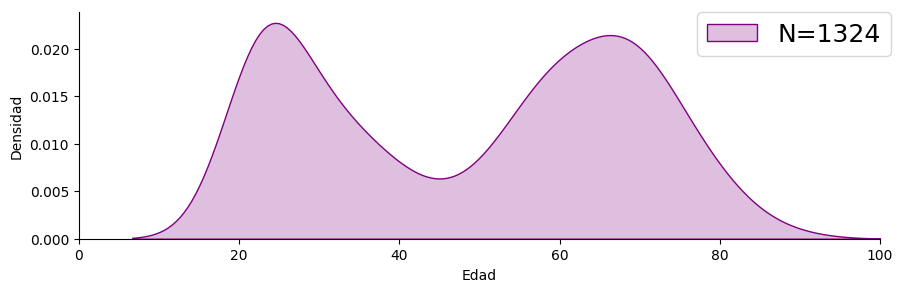

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Contar el número de personas en el DataFrame filtrado
num_personas = df_filtrado_sin_nulos.shape[0]

# Crear el FacetGrid
facet = sns.FacetGrid(df_filtrado, aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True, color='purple')  # Cambia el color aquí
facet.set(xlim=(df['Age'].min(), df['Age'].max()))

legend = facet.fig.legend(labels=[f'N={num_personas}'], loc='upper right', prop={'size': 18})

# Cambiar los nombres de los ejes
facet.set_axis_labels("Edad", "Densidad")

# Establecer los límites del eje x y mostrar el gráfico
plt.xlim(0, 100)
plt.show()

In [15]:
X = df_filtrado_sin_nulos.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado_sin_nulos["Age"]


xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)

In [ ]:
opt_xgb_1_electrode, best_params_xgb_1_electrode = xgb_model.search_best_model(n_iter_=400)


In [33]:
#with open('C:/Users/felipe/Documents/opt_XGB_model_1_electrode.pickle', 'wb') as file:
#        pickle.dump(opt_xgb_1_electrode, file)

In [13]:
with open(f'{path}Opt_Model/opt_XGB_model_1_electrode.pickle', 'rb') as file:
    opt_xgb_1_electrode= pickle.load(file)

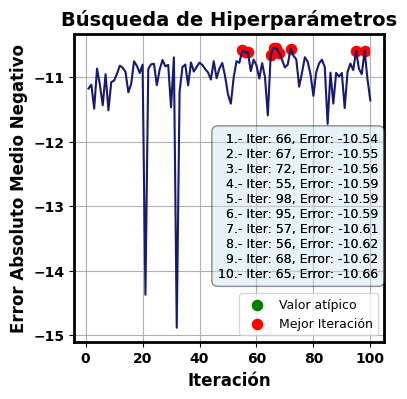

Top 1: Iteración 66, Error -10.54311913238096
Top 2: Iteración 67, Error -10.552574601243377
Top 3: Iteración 72, Error -10.555281735329116
Top 4: Iteración 55, Error -10.585808461152997
Top 5: Iteración 98, Error -10.591813517230896
Top 6: Iteración 95, Error -10.591841354410104
Top 7: Iteración 57, Error -10.614637832475944
Top 8: Iteración 56, Error -10.615857598189645
Top 9: Iteración 68, Error -10.62476023139051
Top 10: Iteración 65, Error -10.660197841053632


In [16]:
xgb_model.plot_search_best_model(opt_xgb_1_electrode, linewidth=1.5, color='midnightblue', num_max=100)

In [17]:
best_params_xgb = xgb_model.best_hyper(opt_xgb_1_electrode, num_max=100)

In [18]:
best_params_xgb

[{'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1273,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1404,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1374,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 934,
  'subsample': 0.6},
 {'colsample_bytree': 0.9809982090164175,
  'learning_rate': 0.013771489964821025,
  'max_depth': 3,
  'n_estimators': 1316,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1295,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.018916180741032892,
  'max_depth': 3,
  'n_estimators': 1039,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.018250278426012963,
  'max_depth': 3,
  'n_estimators': 1050,
  'subsample': 0.6},
 {'colsample_bytre

In [19]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 12,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": True
            }

In [ ]:
results, best_model_results, best_model = xgb_model.trainer(params_=best_params_xgb[0])

In [22]:
with open(f'{path}Opt_Model/BestModel_XGB_all_features_1electrode.pickle', 'wb') as file:
    pickle.dump(best_model, file)
with open(f'{path}Opt_Model/results_XGB_model_all_features_1electrode.pickle', 'wb') as file:
    pickle.dump(results, file)

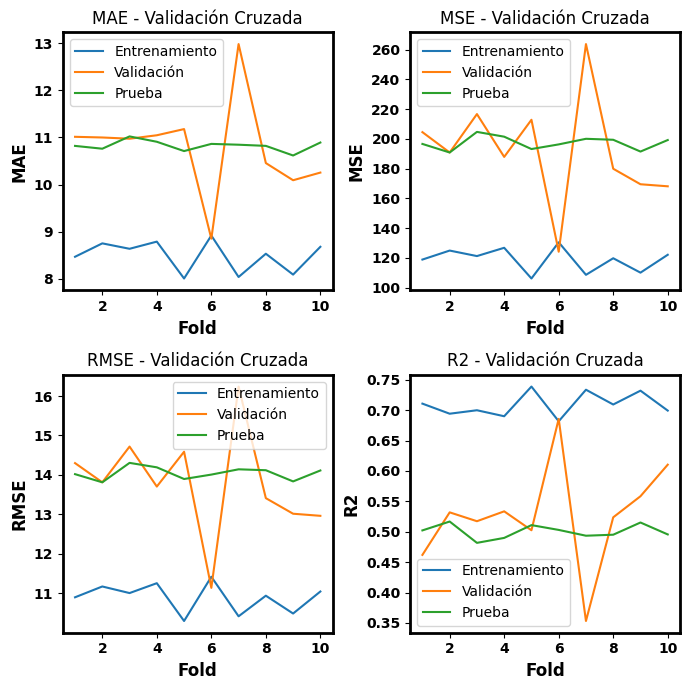

In [36]:
xgb_model.plot_metricas_evaluacion(results)

In [21]:
y_pred=xgb_model.predicter(xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           4.62e-42
Time:                        13:00:21   Log-Likelihood:                -976.64
No. Observations:                 265   AIC:                             1957.
Df Residuals:                     263   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2059      1.552     16.246      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


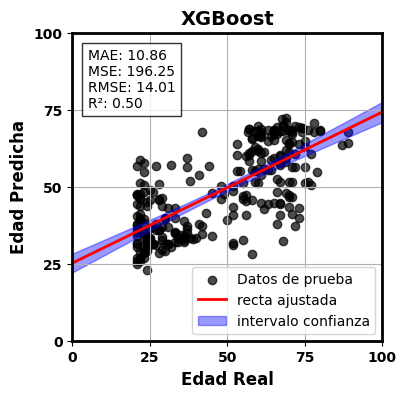

Error medio absoluto: 10.863750762459619
Error cuadrático medio: 196.25238272748638
Raíz del error cuadrático medio: 14.009010769054552
Coeficiente de determinación (R²): 0.5030477492708639


In [23]:
xgb_model.plot_regresion(y=y_pred,x= xgb_model.y_test,label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False, xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [24]:
y_pred_train=xgb_model.predicter(xgb_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2426.
Date:                Sat, 17 Aug 2024   Prob (F-statistic):          5.96e-276
Time:                        13:00:26   Log-Likelihood:                -3699.2
No. Observations:                1059   AIC:                             7402.
Df Residuals:                    1057   BIC:                             7412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9296      0.646     30.869      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


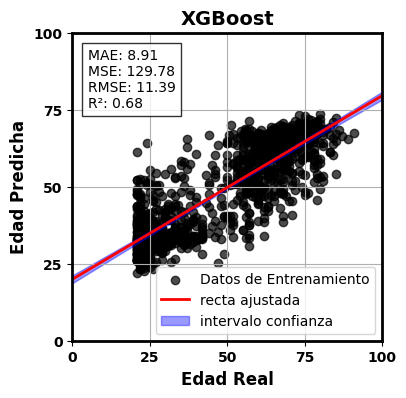

Error medio absoluto: 8.912680045666093
Error cuadrático medio: 129.7798970253999
Raíz del error cuadrático medio: 11.392098008066815
Coeficiente de determinación (R²): 0.6821883151191415


In [25]:
xgb_model.plot_regresion(y=y_pred_train,x= xgb_model.y_train,label_='Datos de Entrenamiento',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False, xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [26]:
residuals = xgb_model.predicter(xgb_model.X_train)-xgb_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     1109.
Date:                Sat, 17 Aug 2024   Prob (F-statistic):          7.46e-167
Time:                        13:00:29   Log-Likelihood:                -3699.2
No. Observations:                1059   AIC:                             7402.
Df Residuals:                    1057   BIC:                             7412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9296      0.646     30.869      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


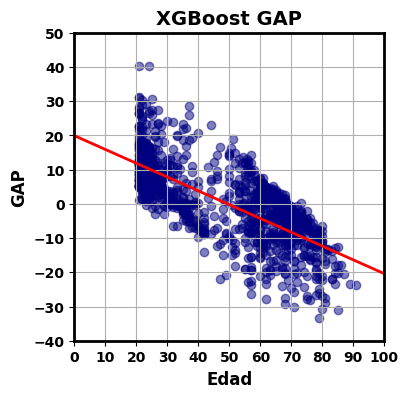

Error medio absoluto: 49.54338051216911
Error cuadrático medio: 3296.3364818533983
Raíz del error cuadrático medio: 57.41373077804123
Coeficiente de determinación (R²): -7.072238268358589


In [27]:
xgb_model.plot_regresion(y=residuals,x=xgb_model.y_train,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='XGBoost GAP', xlabel='Edad', ylabel='GAP')

In [28]:
y_pred_corrected=xgb_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     891.7
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           1.80e-86
Time:                        13:00:36   Log-Likelihood:                -976.64
No. Observations:                 265   AIC:                             1957.
Df Residuals:                     263   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2764      1.552      3.401      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


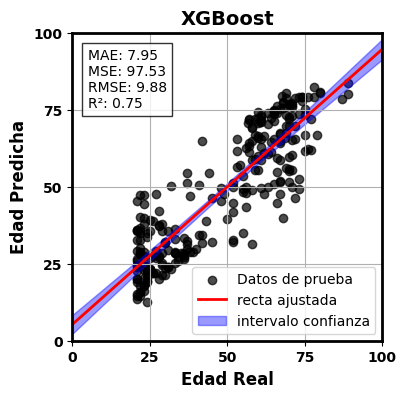

Error medio absoluto: 7.951199866647029
Error cuadrático medio: 97.5328698546929
Raíz del error cuadrático medio: 9.875873118600346
Coeficiente de determinación (R²): 0.7530262893079609


In [29]:
xgb_model.plot_regresion(y=y_pred_corrected,x= xgb_model.y_test,label_='Datos de prueba',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='black', title='XGBoost',color_line_ideal='gray',  alpha=0.7,line_ideal=False, xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

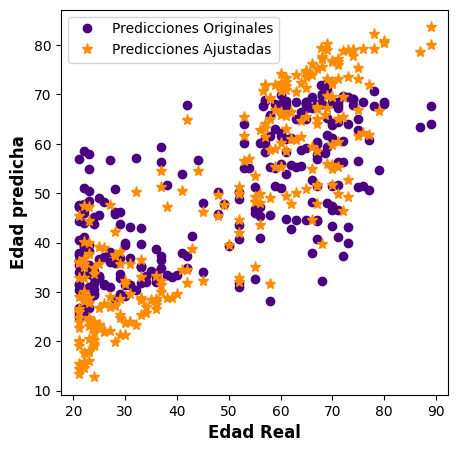

In [33]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(xgb_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(xgb_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [34]:
with open(f'{path}Brain_Age/Age_Array/xgb_edad_predicha_array_1electrode.pickle', 'wb') as file:
        pickle.dump(y_pred, file)

In [46]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
PE: 1246.5782470703125
IAF: 836.5477294921875
Beta2_canon_RPD: 711.8410034179688
Beta1_canon_RPD: 600.5899047851562
Beta_subj_spec_RPD: 478.8628234863281
Alpha2_canon_RPD: 476.648681640625
SSV: 364.7209777832031
WMEAN: 343.91937255859375
Beta3_canon_RPD: 343.2712097167969
Low_subj_spec_RPD: 167.57728576660156
Theta_subj_spec_RPD: 156.72694396972656
Theta_canon_RPD: 140.2476348876953
Offset: 112.3864974975586
Knee: 85.2269515991211
FD: 75.35213470458984
Gamma_canon_RPD: 60.95183563232422
Gamma_subj_spec_RPD: 56.36168670654297
Alpha1_canon_RPD: 56.133968353271484
Low_subj_spec_EPP: 52.974342346191406
High_subj_spec_RPD: 48.967071533203125
Delta_canon_RPD: 39.447898864746094
Delta_subj_spec_RPD: 36.9598388671875
Slope: 34.42363739013672
TF: 17.314123153686523
Delta_canon_EPP: 0.0
Theta_canon_EPP: 0.0
Alpha1_canon_EPP: 0.0
Alpha2_canon_EPP: 0.0
Beta1_canon_EPP: 0.0
Beta2_canon_EPP: 0.0
Beta3_canon_EPP: 0.0
Gamma_canon_EPP: 0.0


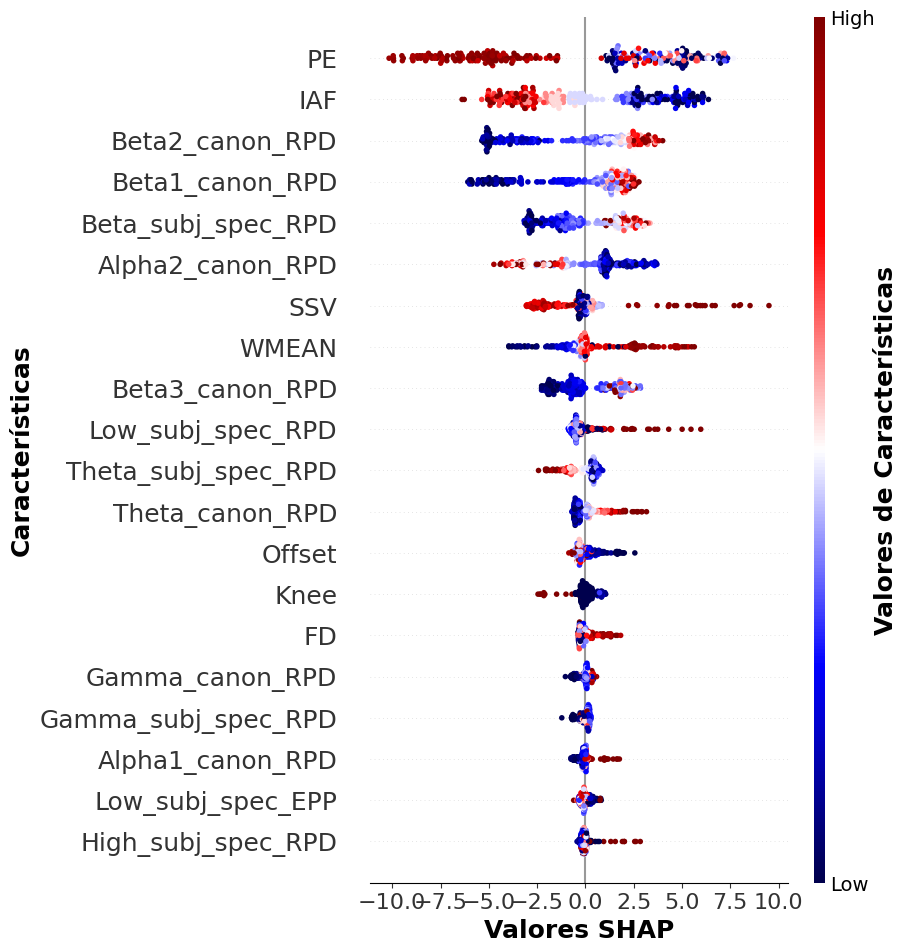

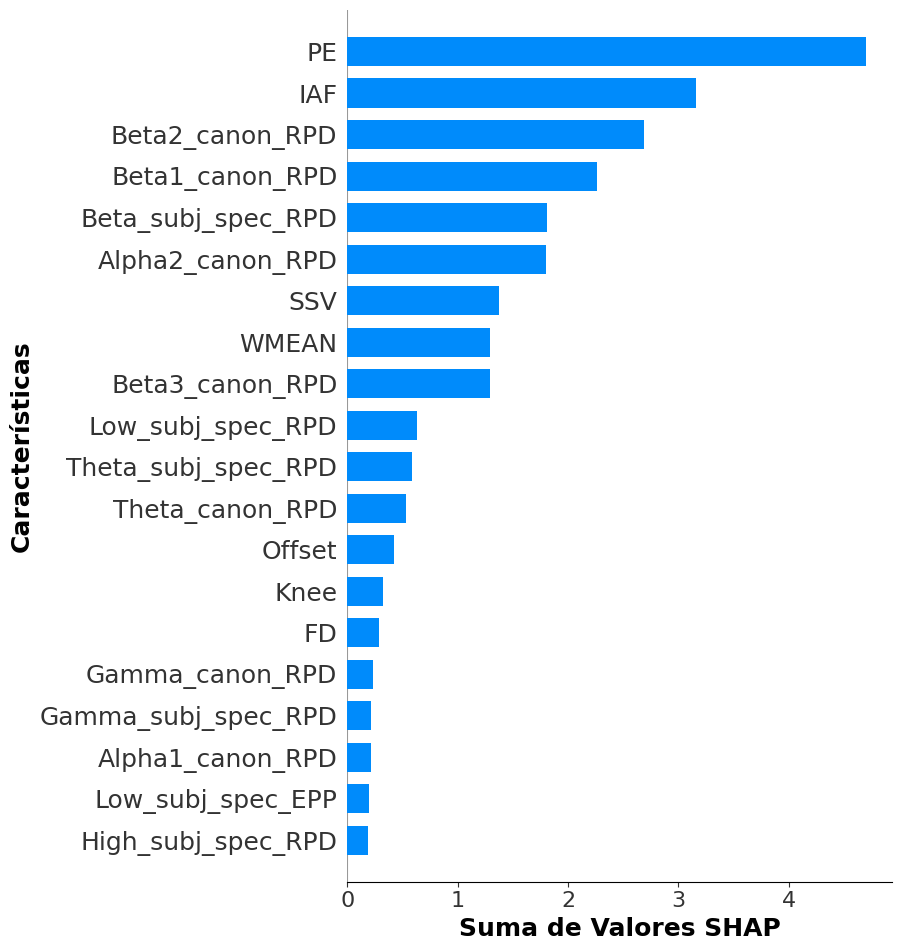

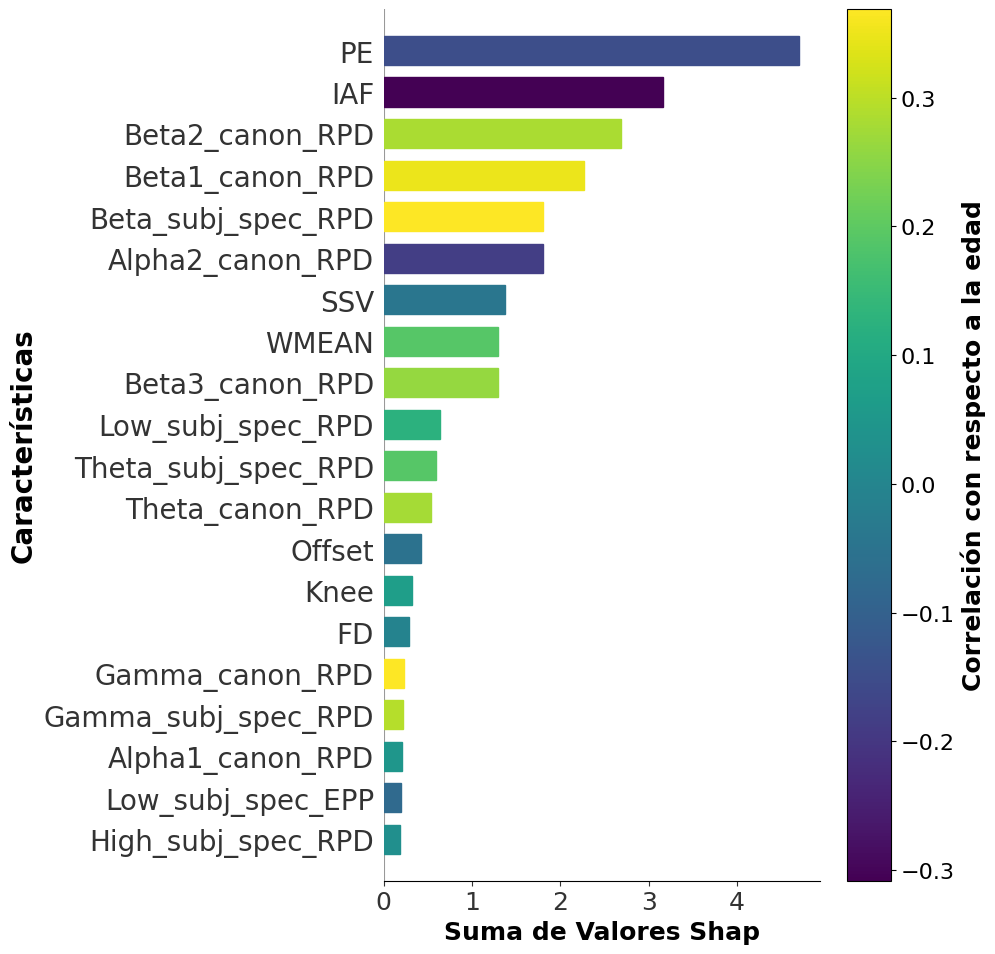

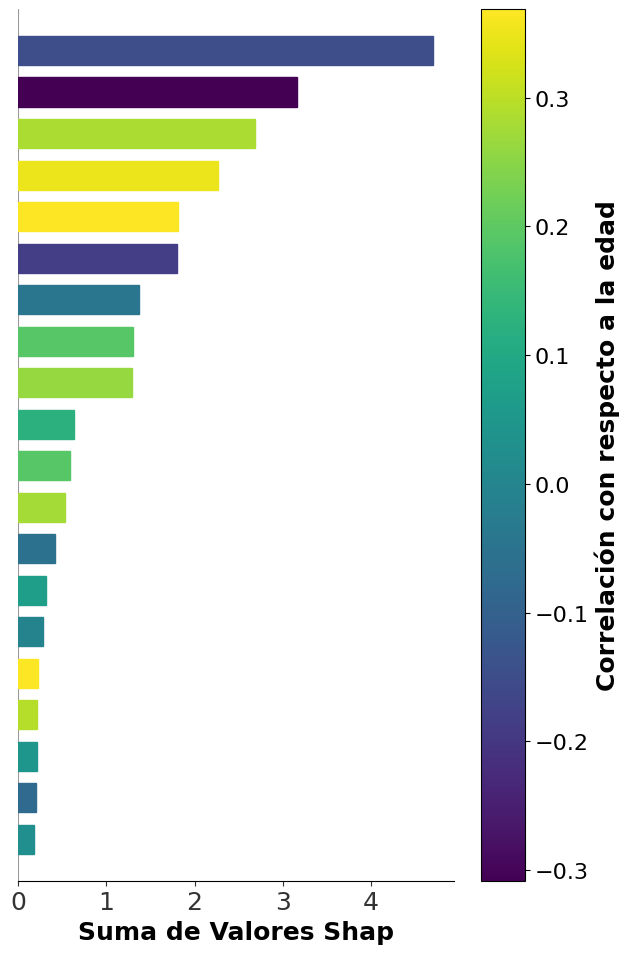

In [47]:
xgb_model.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test)